In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
%matplotlib inline


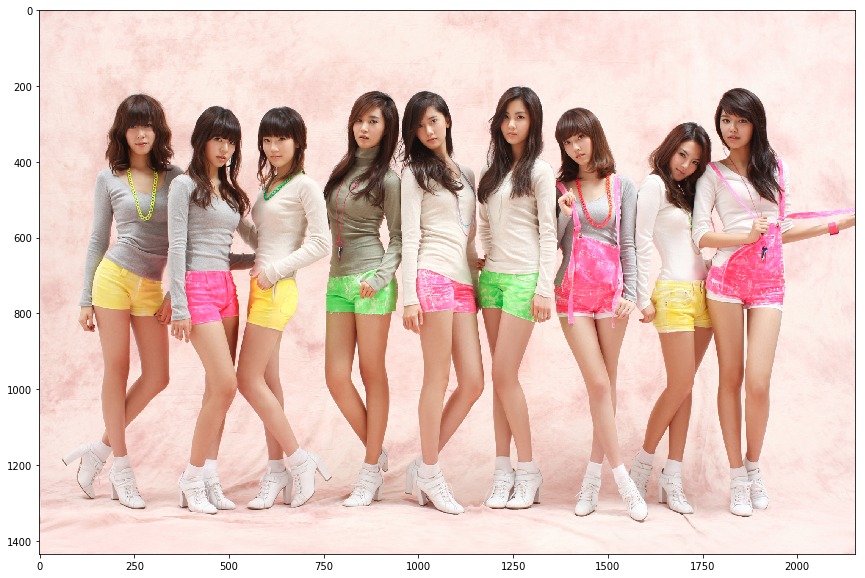

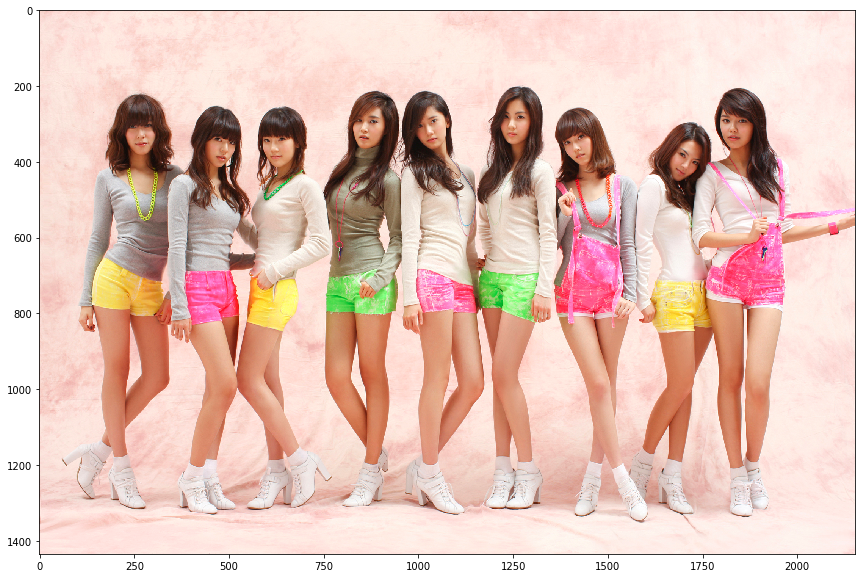

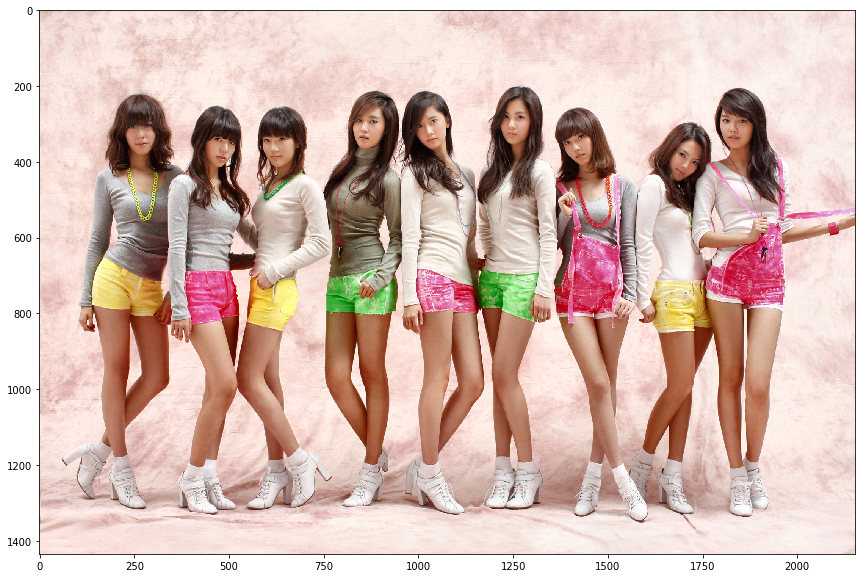

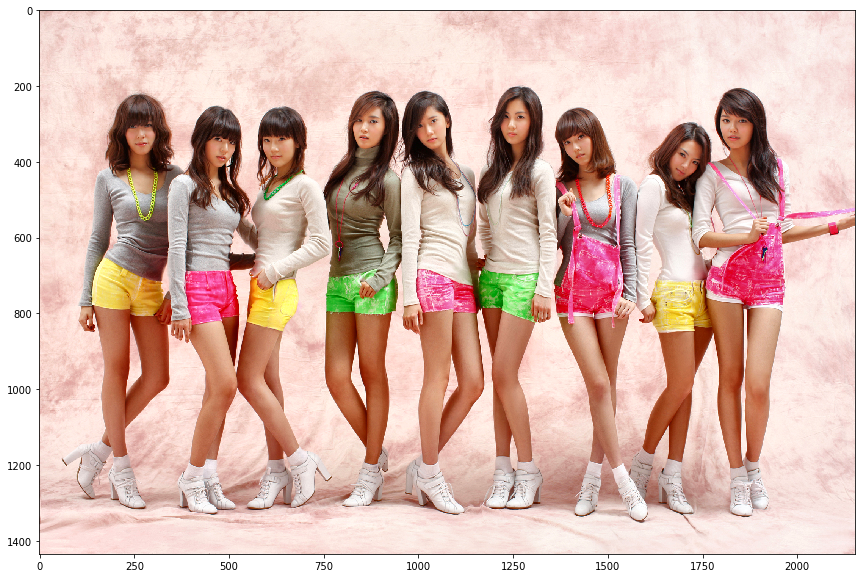

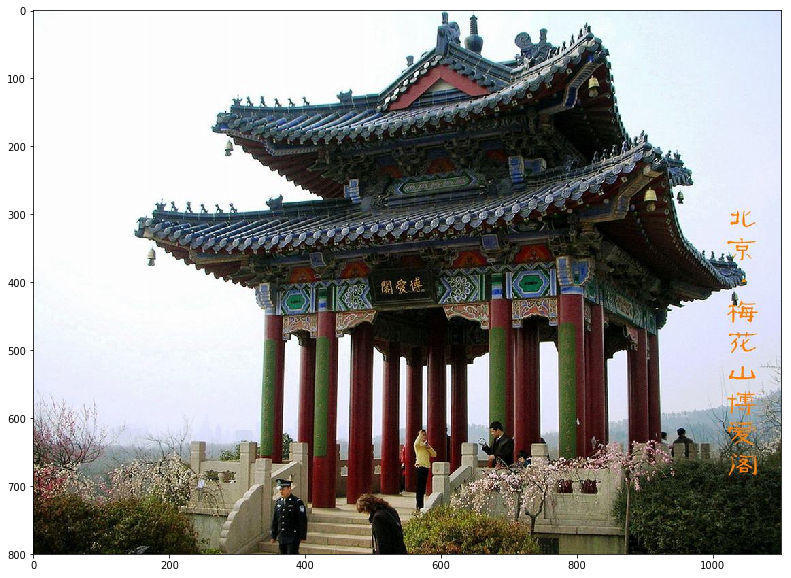

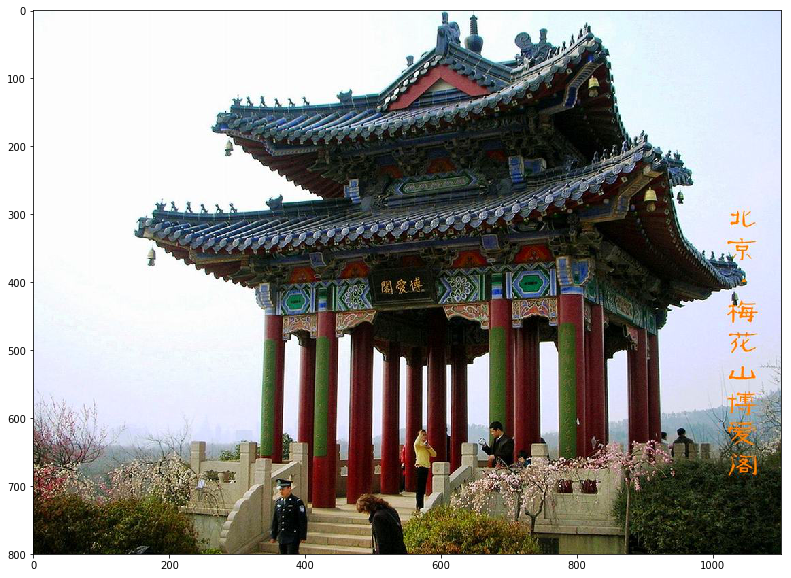

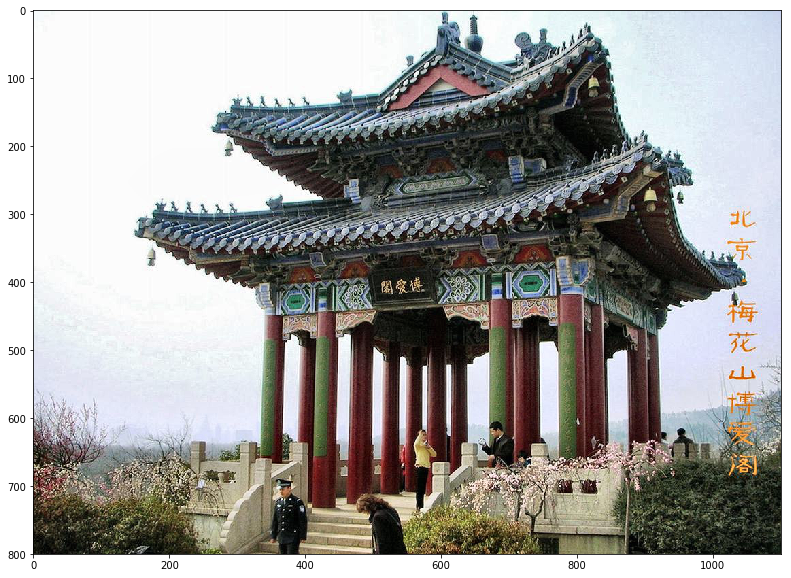

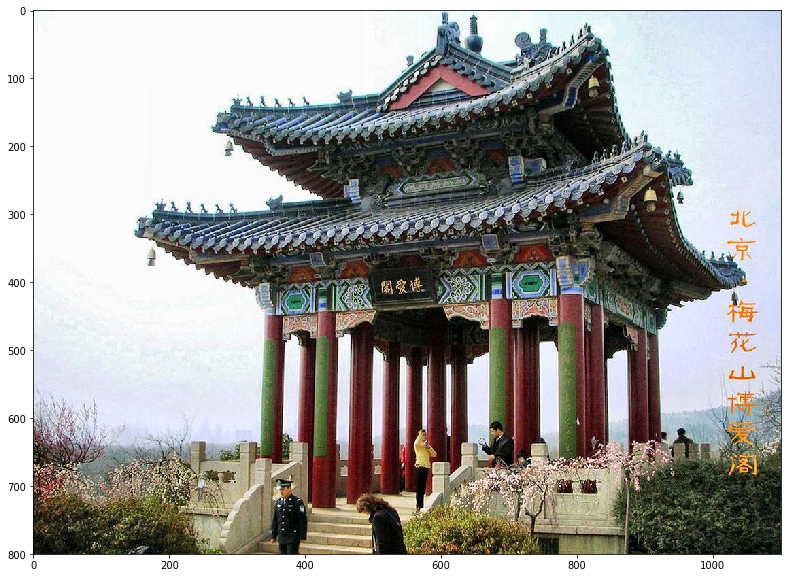

In [84]:
def test_func(file_name, color_enhance=1.2):
    img_ = Image.open(file_name)
    img_arr = np.array(img_)
    
    img = ImageEnhance.Color(img_).enhance(color_enhance)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('res_1_' + file_name, img)
    
    
    img_yuv = cv2.cvtColor(img_arr, cv2.COLOR_RGB2YUV)
    clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(8, 8))
    img_yuv[:,:,0]  = clahe.apply(img_yuv[:,:,0])
    img_clahe = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    cv2.imwrite('res_2_' + file_name, img_clahe)
    
    
    img_cb = cv2.cvtColor(img_clahe, cv2.COLOR_RGB2BGR)
    img_cb = Image.fromarray(img_cb)
    img_cb = ImageEnhance.Color(img_cb).enhance(color_enhance)
    img_cb = np.array(img_cb)
    img_cb = cv2.cvtColor(img_cb, cv2.COLOR_RGB2BGR)
    cv2.imwrite('res_3_' + file_name, img_cb)

    plt.figure(figsize=(20, 10))
    plt.imshow(img_arr)
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_RGB2BGR))
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(img_cb, cv2.COLOR_RGB2BGR))
    
test_func('1783969435.jpg')
test_func('579983788.jpg')

In [85]:
! zip res_0322.zip *jpg

  adding: 1783969435.jpg (deflated 1%)
  adding: 579983788.jpg (deflated 1%)
  adding: res_1_1783969435.jpg (deflated 0%)
  adding: res_1_579983788.jpg (deflated 5%)
  adding: res_2_1783969435.jpg (deflated 0%)
  adding: res_2_579983788.jpg (deflated 3%)
  adding: res_3_1783969435.jpg (deflated 0%)
  adding: res_3_579983788.jpg (deflated 3%)
